In [439]:
###ENSEEIHT-INP TOULOUSE
###TDM DE PROCESSUS STOCHASTIQUE: Etudes de modèles épidémiques stochastiques
###Modèle déterministe ODE- Modèle de chaines de Markov en temps continu CTMC- Modèle de système d'équations différentielles stochastiques SDE 
###Encadrants: Remi ZAMANSKY- Wladimir BERGEZ 
###Copyright OUEDRAOGO TEGAWENDE ARNAUD- EDEN GETACHEW- RIANO JUAN PABLO
###c février 2022

In [ ]:
###Import des librairies

from matplotlib import pyplot
from scipy.integrate import odeint
import numpy as np
import math

##Definition de fonction pour les plot
def plotting_stuff(pos_x,pos_y):
    pyplot.grid()
    pyplot.xticks(fontsize=14)
    pyplot.yticks(fontsize=14)
    pyplot.legend(fontsize=13)
    #yplot.legend(fontsize=12,bbox_to_anchor=(1,0.58),loc='upper right')
    pyplot.legend(fontsize=12,bbox_to_anchor=(pos_x,pos_y),loc='upper right')


In [440]:
##Fonction de définition de résolution de l'EDO
###elle prend en paramètre les paramètre initiaux (S0,R0,I0) et le temps t
def diff_systeme(param,t):
    beta=5
    gamma=1
    S,I,R,N=param
    N=S+I+R
    dSdt=(-beta/N)*I*S
    dIdt=((beta/N)*I*S)-(gamma*I)
    dRdt=(gamma*I)
    dN=dSdt+dIdt+dRdt
    
    return [dSdt,dIdt,dRdt,dN]

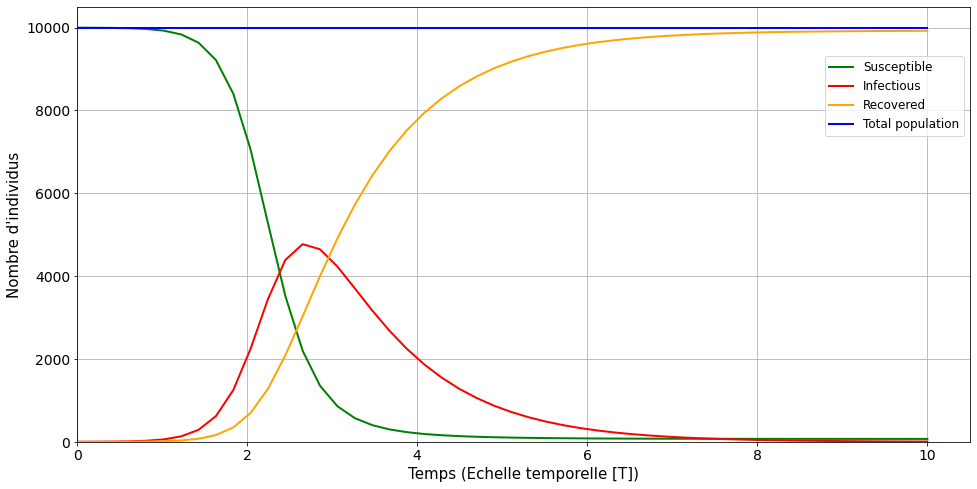

In [442]:
###Fonction de résolution des EDO
def resolve_all():
    beta=5
    gamma=1
    S0=9999
    I0=1
    R0=0
    N=S0+R0+I0
    t=np.linspace(0,10)
    
    param_0=[S0,I0,R0,N]
    
    result=odeint(diff_systeme,param_0,t) ##résolution des EDO
    
    ###On plot à present nos résultats
    pyplot.figure(figsize=(16,8))

    pyplot.plot(t,result[:,0],linestyle="-",color='green',linewidth=2,label="Susceptible")
    pyplot.plot(t,result[:,1],linestyle="-",color='red',linewidth=2,label="Infectious")
    pyplot.plot(t,result[:,2],linestyle="-",color='orange',linewidth=2,label="Recovered")
    pyplot.plot(t,result[:,3],linestyle="-",color='blue',linewidth=2,label="Total population")

    plotting_stuff(1,0.9)
    pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
    pyplot.ylabel("Nombre d'individus",size=15)
    pyplot.xlim(0,)
    pyplot.ylim(0,)
    #pyplot.savefig("deterministe_ex2",dpi=300)   ##Sauvegarde de l'image des résultats obtenus
        
    
    pyplot.show()
    
    
resolve_all()

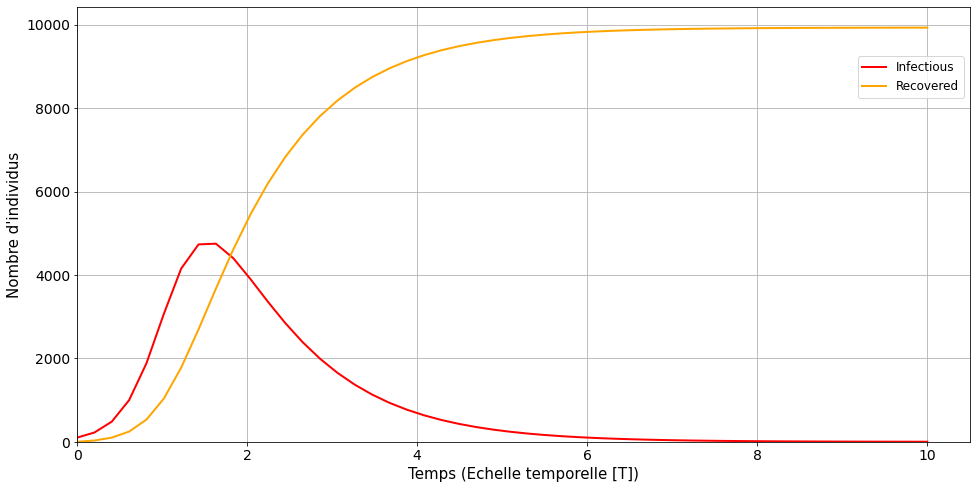

In [444]:
###Test des conditions condition I>0 and Ro<1 ou R0>1
###Il faut modifier les valeurs de beta et gamma de façon à avoir beta/gamma<1 ou l'inverse
def resolve_all_test_Ro():
    beta=5
    gamma=1
    S0=9900
    I0=100
    R0=0
    N=S0+R0+I0
    t=np.linspace(0,10)
    
    param_0=[S0,I0,R0,N]
    
    result=odeint(diff_systeme,param_0,t)
    
    pyplot.figure(figsize=(16,8))

    #pyplot.plot(t[0:5],result[:,0][0:5],linestyle="-",color='green',linewidth=2,label="Susceptible")   ##Plot de S
    pyplot.plot(t,result[:,1],linestyle="-",color='red',linewidth=2,label="Infectious")                ##Plot de I
    pyplot.plot(t,result[:,2],linestyle="-",color='orange',linewidth=2,label="Recovered")               ##Plot de R
    #pyplot.plot(t[0:5],result[:,3][0:5],linestyle="-",color='blue',linewidth=2,label="Total population")  ##Plot de la population totale
    plotting_stuff(1,0.9)
    pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
    pyplot.ylabel("Nombre d'individus",size=15)
    pyplot.xlim(0,)
    pyplot.ylim(0,)
    pyplot.savefig("deterministe_ex2",dpi=300)
        
    
    pyplot.show()
    
resolve_all_test_Ro()

In [445]:
###Gillespie Alogorithm
###Il s'agit de l'implementation de l'Algorithme de Gillespie pour le CTMC
##Il prend en paramètre les données initiales sur le populations S0,R0,I0, le temps initial T0 et beta, gamma
def Gillespie_alg(I0,S0,R0,T0,beta,gamma):
    ##paramètres connus de départ
    i=I0
    s=S0
    r=R0
    t=T0
    I,S,R,T=[i],[s],[r],[t]
    N=I0+S0+R0
    while i!=0:  ##Condition de fin d'épidemie. On arrete l'execution ç la fin de l'épidemie
        lambda_total=((beta/N)*s*i)+(gamma*i)
        pi=(beta/N)*s*i/lambda_total
        pg=gamma*i/lambda_total
        u1=np.random.uniform(0,1)
        delta_t=-math.log(u1)/lambda_total
        t+=delta_t
        u2=np.random.uniform(0,1)
        if u2<pi:
            i+=1
            s-=1
        else:
            r+=1
            i-=1
        I.append(i)
        S.append(s)
        R.append(r)
        T.append(t)
    return I,S,R,T
    

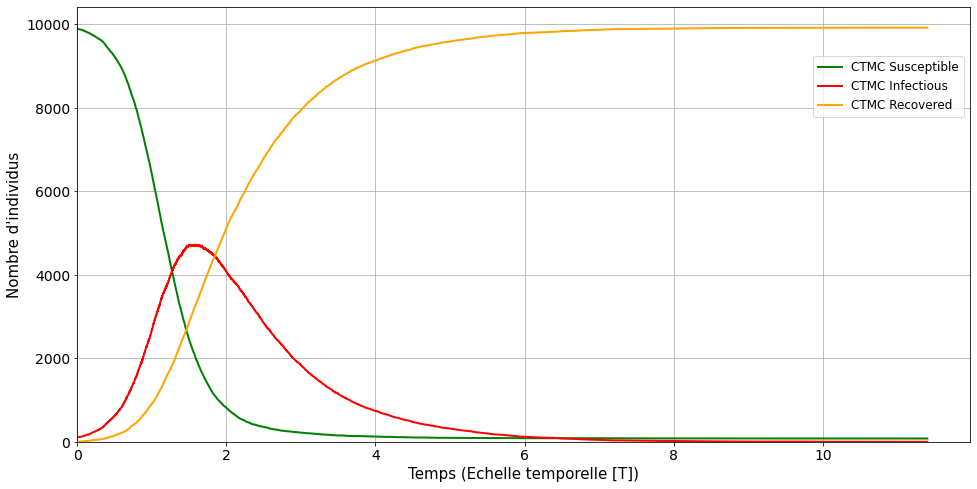

In [446]:
###Traçage des résultats CTMC de l'alogotithme de Gillespie in general
I,S,R,T=Gillespie_alg(100,9900,0,0,5,1)
pyplot.figure(figsize=(16,8))
pyplot.plot(T,S,linestyle="-",color='green',linewidth=2,label="CTMC Susceptible")
pyplot.plot(T,I,linestyle="-",color='red',linewidth=2,label="CTMC Infectious")
pyplot.plot(T,R,linestyle="-",color='orange',linewidth=2,label="CTMC Recovered")
#pyplot.plot(T,N,linestyle="-",color='blue',linewidth=2,label="Total population")
pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
pyplot.ylabel("Nombre d'individus",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
#pyplot.savefig("Gillespie",dpi=300)  ##Sauvegarde de l'image des résultats
plotting_stuff(1,0.9)
pyplot.show()

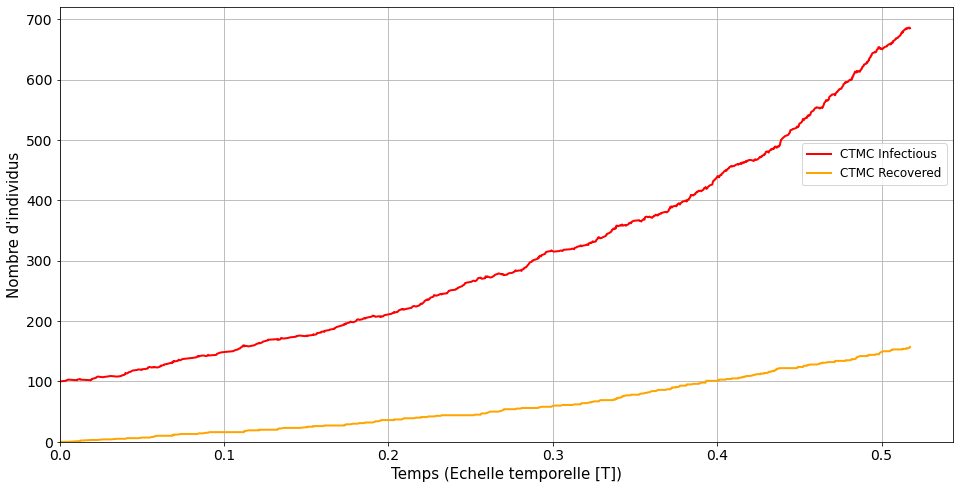

In [447]:
###Zoom sur les résultats CTMC de Gillespie pour t<0.65
I,S,R,T=Gillespie_alg(100,9900,0,0,5,1)
pyplot.figure(figsize=(16,8))
#pyplot.plot(T[0:9000],S[0:9000],linestyle="-",color='green',linewidth=2,label="CTMC Susceptible")
pyplot.plot(T[0:900],I[0:900],linestyle="-",color='red',linewidth=2,label="CTMC Infectious")
pyplot.plot(T[0:900],R[0:900],linestyle="-",color='orange',linewidth=2,label="CTMC Recovered")
#pyplot.plot(T,N,linestyle="-",color='blue',linewidth=2,label="Total population")
pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
pyplot.ylabel("Nombre d'individus",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.savefig("Gillespie",dpi=300)
plotting_stuff(1,0.7)



pyplot.show()

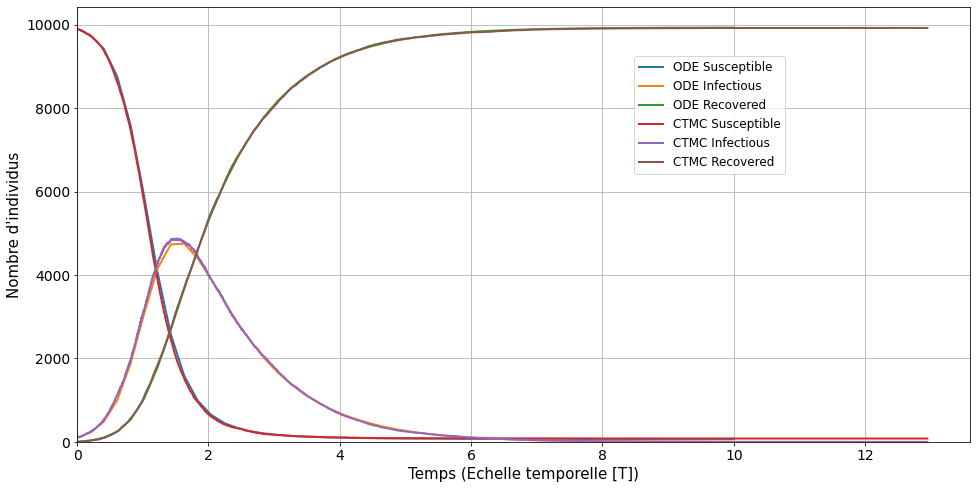

In [451]:
###Fonction de comparaison Gillespie and ODE
###Elle compare les deux modèles ODE et CTMC. Il est possible de zoomer dans la comparaion. Pour cela, il faut juste choisir les bornes des vecteurs résultats.
##
def comp_SDE_Gillespie():
    ##paramètres connus de départ
    beta=5
    gamma=1
    S0=9900
    I0=100
    R0=0
    N=S0+R0+I0
    t=np.linspace(0,10)
    
    param_0=[S0,I0,R0,N]
    
    result=odeint(diff_systeme,param_0,t)
    
    pyplot.figure(figsize=(16,8))

    pyplot.plot(t,result[:,0],linestyle="-",linewidth=2,label="ODE Susceptible")
    pyplot.plot(t,result[:,1],linestyle="-",linewidth=2,label="ODE Infectious")
    pyplot.plot(t,result[:,2],linestyle="-",linewidth=2,label="ODE Recovered")
    #pyplot.plot(t,result[:,3],linestyle="-",linewidth=2,label="Total population")
    
    I,S,R,T=Gillespie_alg(100,9900,0,0,5,1)   ###Obtention des resultats du modele CTMC
    pyplot.plot(T,S,linestyle="-",linewidth=2,label="CTMC Susceptible")
    pyplot.plot(T,I,linestyle="-",linewidth=2,label="CTMC Infectious")
    pyplot.plot(T,R,linestyle="-",linewidth=2,label="CTMC Recovered")
    
    ###Plot zoomer au début de l'épidemie
    """"pyplot.plot(T[0:900],S[0:900],linestyle="-",linewidth=2,label="CTMC Susceptible")
    pyplot.plot(T[0:900],I[0:900],linestyle="-",linewidth=2,label="CTMC Infectious")
    pyplot.plot(T[0:900],R[0:900],linestyle="-",linewidth=2,label="CTMC Recovered")
    pyplot.plot(t,result[:,0],linestyle="-",linewidth=2,label="ODE Susceptible")
    pyplot.plot(t[0:4],result[:,1][0:4],linestyle="-",linewidth=2,label="ODE Infectious")
    pyplot.plot(t[0:4],result[:,2][0:4],linestyle="-",linewidth=2,label="ODE Recovered")
    #pyplot.plot(t,result[:,3],linestyle="-",linewidth=2,label="Total population")
    """

    plotting_stuff(0.8,0.9)
    pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
    pyplot.ylabel("Nombre d'individus",size=15)
    pyplot.xlim(0,)
    pyplot.ylim(0,)
    pyplot.savefig("comp_ODE_Gillespie_zoom",dpi=300)
        
    
    pyplot.show()
        
    
comp_SDE_Gillespie()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


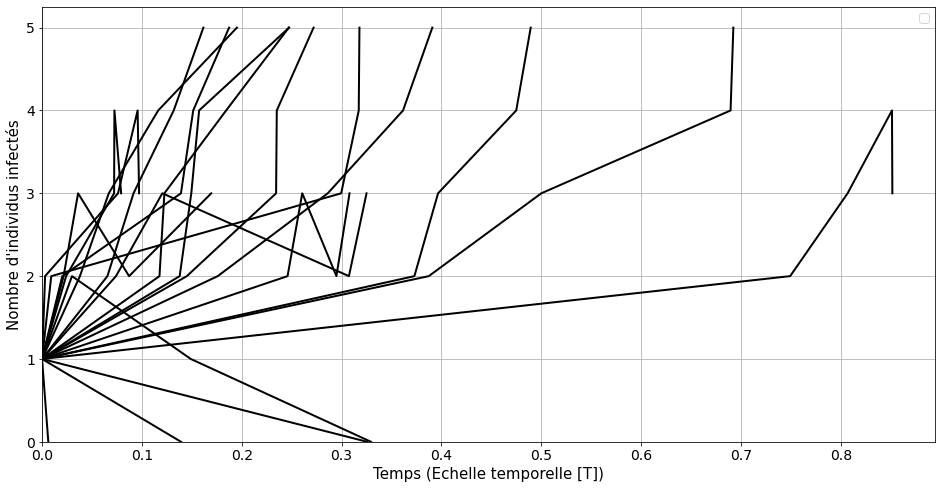

3


In [454]:
##Fonction de Simulation Arret prématurée pour le modele CTMC
fraction=0 ##Initialisation de la fraction d'arret prématuré
pyplot.figure(figsize=(16,8))
for v in range (20):  ###On parcourt selon de nombre de simulations considéré. Ici 20 simu
    ##paramètre de départ connu
    i=1
    s=10000-i
    r=0
    t=0
    I,S,R,T=[i],[s],[r],[t]
    N=10000
    beta=5
    gamma=1
    while i!=0: ##Condition d'arrêt d'execution de la boucle
        lambda_total=((beta/N)*s*i)+(gamma*i)
        pi=((beta/N)*s*i)/lambda_total
        pg=gamma*i/lambda_total
        u1=np.random.uniform(0,1)
        delta_t=-math.log(u1)/lambda_total
        t+=delta_t
        u2=np.random.uniform(0,1)
        if u2<pi:
            i+=1
            s-=1
        else:
            r+=1
            i-=1
        I.append(i)
        S.append(s)
        R.append(r)
        T.append(t)
        if (i==0 and r==1):  ###Condition d'arrêt prématuré
            fraction+=1
    

    pyplot.plot(T[:5],I[:5],linestyle="-",color="black",linewidth=2)
    #pyplot.plot(T[:],S[:],linestyle="-",linewidth=2,label="Infectious")
    #pyplot.plot(T[:5],R[:5],linestyle="-",linewidth=2)
pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
pyplot.ylabel("Nombre d'individus infectés",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
#pyplot.savefig("arret_premature_rebond",dpi=300)
plotting_stuff(1,1)
pyplot.show()
        
        
print (fraction) ###On affiche le nombre de simulations conduisant à un arret prematuré

In [455]:
###Fonction de simulation d'arrêt précipité
fraction=0          ##Initialisation de la fraction d'arret prématuré
for v in range (1000):           ##Dans notre cas on considère 1000 epidémies
    I,S,R,T=[],[],[],[]
    i=1
    s=9999
    r=0
    t=0
    N=10000
    beta=5
    gamma=1
    while i!=0:
        lambda_total=((beta/N)*s*i)+(gamma*i)
        pi=((beta/N)*s*i)/lambda_total
        pg=gamma*i/lambda_total
        u1=np.random.uniform(0,1)
        delta_t=-math.log(u1)/lambda_total
        t+=delta_t
        u2=np.random.uniform(0,1)
        if u2<pi:
            i+=1
            s-=1
        else:
            r+=1
            i-=1
        I.append(i)
        S.append(s)
        R.append(r)
        T.append(t)
        if (i==0 and r<s):    ##Condition d'arrêt précipité
            fraction+=1
        
prob=fraction/10000       
print (prob)  ###Affichage de la probabilité d'arrêt précipité

0.0185


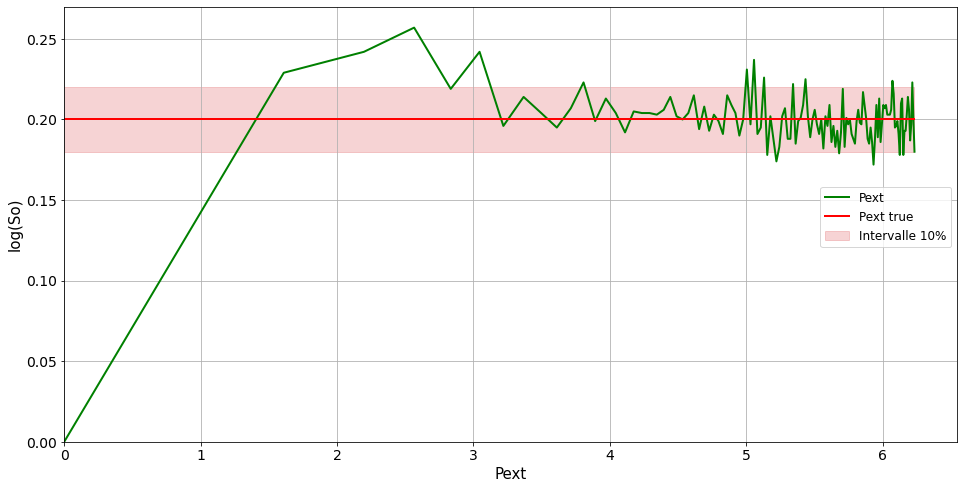

In [456]:
####Graphique de  Pext=lnSo
pext=[]
lnSo=[]
pyplot.figure(figsize=(16,8))
for s_value in range(1,513,2**2):
    lnSo.append(math.log(s_value))
    fraction=0
    for v in range (1000):
        I,S,R,T=[],[],[],[]
        i=1
        s=s_value
        r=0
        t=0
        N=i+s+r
        beta=5
        gamma=1
        while i!=0:
            lambda_total=((beta/N)*s*i)+(gamma*i)
            pi=((beta/N)*s*i)/lambda_total
            pg=gamma*i/lambda_total
            u1=np.random.uniform(0,1)
            delta_t=-math.log(u1)/lambda_total
            t+=delta_t
            u2=np.random.uniform(0,1)
            if u2<pi:
                i+=1
                s-=1
            else:
                r+=1
                i-=1
            I.append(i)
            S.append(s)
            R.append(r)
            T.append(t)
            if (i==0 and r<s):
                fraction+=1
    prob=fraction/1000
    pext.append(prob)
pyplot.plot(lnSo,pext,linestyle="-",color='green',linewidth=2,label="Pext")
good_value=[gamma/beta,gamma/beta]
x_good_value=[0,max(lnSo)]
pyplot.plot(x_good_value,good_value,linestyle="-",color='red',linewidth=2,label="Pext true")
good_value_lower=[i-0.1*i for i in good_value]
good_value_upper=[i+0.1*i for i in good_value]
pyplot.fill_between(x_good_value, good_value_lower, good_value_upper, alpha=0.2,color='tab:red',label="Intervalle 10%")
#pyplot.xscale('log')
pyplot.xlabel("Pext",size=15)
pyplot.ylabel("log(So)",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.savefig("pext_lnSo",dpi=300)
plotting_stuff(1,0.6)
pyplot.show()

In [457]:
#Limite diffusive SDE
gamma=1
beta=5

S=[]
R=[]
I=[]
T=[]
#START
s=20000
r=0
i=1
t=0
N=s+r+i
deltat=0.001
S=[s]
R=[r]
I=[i]
T=[t]
#EULERS METHOD CALCUL 
while(i>=0 and s>0):
        dwi=np.random.randn(1)
        dwg=np.random.randn(1)
        s=s+(((-beta/N)*i*s*deltat)+(np.sqrt((beta/N)*i*s)*dwi*np.sqrt(deltat)))
        i=i+(((beta*s*i/N)-gamma*i)*deltat)-(np.sqrt((beta/N)*i*s)*dwi*np.sqrt(deltat))+(np.sqrt(gamma*i)*dwg*np.sqrt(deltat))
        #print("s vaut:{}".format(s))
        #print("i vaut:{}".format(i))
        if (i>=0 and s>0):
            S.append(s)
            I.append(i)
            T.append(t)
            #print("t vaut:{}".format(deltat))
            t+=deltat
        elif i<0:
            I.append(0)
            S.append(s)
            t+=deltat
            T.append(t)
            break
#T.append(t)
#I.append(0)
        
    
#TIME AND DISTRIBUTION


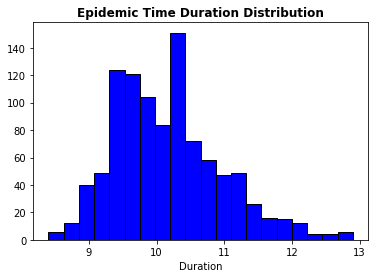

Pandemic duration = 10.14839999999998
Variance of time = 0.7918948415035897


In [466]:
###Analyse de la durée moyenne d'épidémies et du calcul de sa variance

#INITIAL VALUES 

gamma=1
beta=5
temp_tot=100000

#TIME VECTORS 
dt=0.1
dur=[]
Number_epidemics=1000

#INITIAL CONDITIONS FOR I.S.R
for j in range(0,Number_epidemics,1): 
    Io=100
    So=10000-Io
    Ro=0
    N=So+Io+Ro
    t0=0
    S=[]
    I=[]
    R=[]
    vector_t=[]
    S.append(So)
    I.append(Io)
    R.append(Ro)
    vector_t.append(t0)
    variance=np.sqrt(dt)
    
    #EULERS METHOD CALCUL 
    for i in range(1,temp_tot,1):
        t0=t0+dt
        vector_t.append(t0)
        
        #WEINER INDEPENDENT EVENTS 
        dWi=np.random.randn(1)*variance
        dWg=np.random.randn(1)*variance
        
        S.append(-beta*I[i-1]*S[i-1]*dt/N + np.sqrt(beta*I[i-1]*S[i-1]/N)*dWi[0]+S[i-1])
        I.append((beta*I[i-1]*S[i-1]/N-gamma*I[i-1])*dt + np.sqrt(gamma*I[i-1])*dWg[0]-np.sqrt(beta*I[i-1]*S[i-1]/N)*dWi[0]+I[i-1])
        R.append(N-S[i]-I[i])
        if I[i]<1:
            break         
    dur.append(vector_t[i])

#GRAPH RESULTS 
n_bins = 20
pyplot.hist(dur,n_bins,color = 'blue', edgecolor = 'black')
        
pyplot.xlabel('Duration')
pyplot.title("Epidemic Time Duration Distribution",fontweight ="bold")
pyplot.show()
#PRINT RESULTS 
print('Pandemic duration =',np.average(dur))
print('Variance of time =',np.sqrt(np.var(dur)))

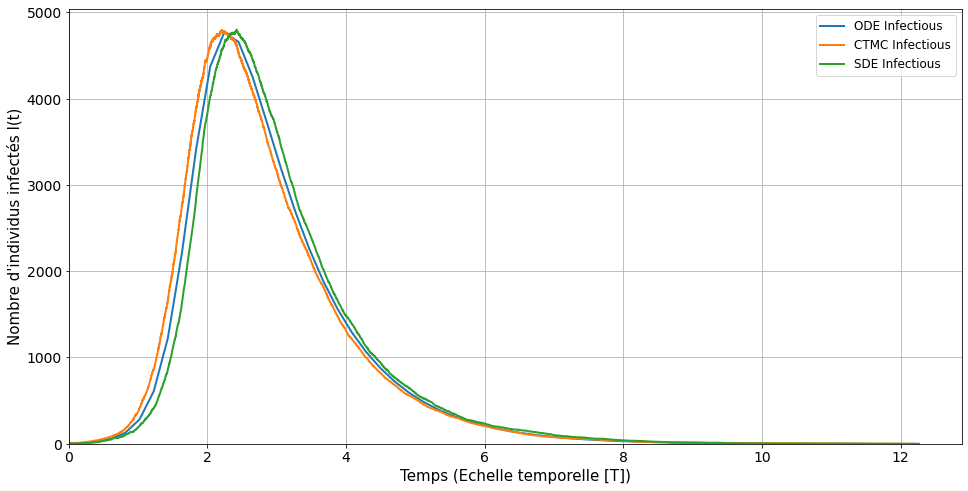

In [459]:
###Comparaison ODE CTMC SDE
def comp_ODE_SDE_Gillespie():
    beta=5
    gamma=1
    S,R,I,T=np.array([]),np.array([]),np.array([]),np.array([])
    S0=9995
    I0=5
    R0=0
    N=S0+R0+I0
    
    s=S0
    r=R0
    i=I0
    t_SDE=0
    deltat=0.001
    S=np.append(S,s)
    R=np.append(R,r)
    I=np.append(I,i)
    T=np.append(T,t_SDE)
    
    
    ###SDE
    while(i>=0 and s>0):
        dwi=np.random.randn(1)
        dwg=np.random.randn(1)
        s=s+(((-beta/N)*i*s*deltat)+(np.sqrt((beta/N)*i*s)*dwi*np.sqrt(deltat)))
        i=i+(((beta*s*i/N)-gamma*i)*deltat)-(np.sqrt((beta/N)*i*s)*dwi*np.sqrt(deltat))+(np.sqrt(gamma*i)*dwg*np.sqrt(deltat))
        #print("s vaut:{}".format(s))
        #print("i vaut:{}".format(i))
        if (i>=0 and s>0):
            S=np.append(S,s)
            I=np.append(I,i)
            T=np.append(T,t_SDE)
            #print("t vaut:{}".format(deltat))
            t_SDE+=deltat
        elif i<0:
            I=np.append(I,0)
            S=np.append(S,s)
            t_SDE+=deltat
            T=np.append(T,t_SDE)
            break
    
    
    t=np.linspace(0,10)
    
    param_0=[S0,I0,R0,N]
    
    result=odeint(diff_systeme,param_0,t)
    
    pyplot.figure(figsize=(16,8))

   # pyplot.plot(t,result[:,0],linestyle="-",linewidth=2,label="ODE Susceptible")
    pyplot.plot(t,result[:,1],linestyle="-",linewidth=2,label="ODE Infectious")
    #pyplot.plot(t,result[:,2],linestyle="-",linewidth=2,label="ODE Recovered")
    #pyplot.plot(t,result[:,3],linestyle="-",linewidth=2,label="Total population")
    
    I_CTMC,S_CTMC,R_CTMC,T_CTMC=Gillespie_alg(5,9995,0,0,5,1)
    #pyplot.plot(T_CTMC,S_CTMC,linestyle="-",linewidth=2,label="CTMC Susceptible")
    pyplot.plot(T_CTMC,I_CTMC,linestyle="-",linewidth=2,label="CTMC Infectious")
    #pyplot.plot(T_CTMC,R_CTMC,linestyle="-",linewidth=2,label="CTMC Recovered")
    
    #pyplot.plot(T,S,linestyle="-",linewidth=2,label="CTMC Susceptible")
    pyplot.plot(T,I,linestyle="-",linewidth=2,label="SDE Infectious")
    #pyplot.plot(T,R,linestyle="-",linewidth=2,label="CTMC Recovered")

    plotting_stuff(1,1)
    pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
    pyplot.ylabel("Nombre d'individus infectés I(t)",size=15)
    pyplot.xlim(0,)
    pyplot.ylim(0,)
    pyplot.savefig("comp_SDE_ODE_9995.png",dpi=300)
        
    
    pyplot.show()
        
    
comp_ODE_SDE_Gillespie()

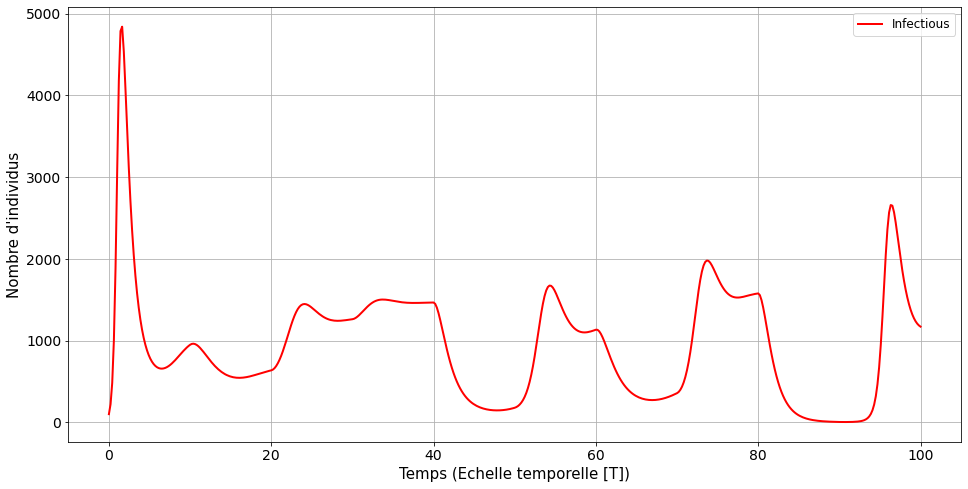

In [460]:
###Prise en compte du rebond épidémique
##alpha: taux de perte de l'immunité 
def diff_systeme_rebond_epidemie(param,t,alpha):
    beta=5
    gamma=1
    S,I,R,N=param
    N=S+I+R
    dSdt=(-beta/N)*I*S + (alpha*R)
    dIdt=((beta/N)*I*S)-(gamma*I)
    dRdt=(gamma*I)- (alpha*R)
    dN=dSdt+dIdt+dRdt
    
    return [dSdt,dIdt,dRdt,dN]


def resolve_rebond():
    beta=5
    gamma=1
    S0=9900
    I0=100
    R0=0
    N=S0+R0+I0
    S,R,I,T=np.array([]),np.array([]),np.array([]),np.array([])
    param_0=[S0,I0,R0,N]
    pyplot.figure(figsize=(16,8))
    for time_limit in range(0,100,10):
        #alpha=0.25                               ###Pour un taux de perte d'immunité constant 
        alpha=np.random.uniform(0,0.25)           ###Pour un taux de perte d'immunité variable suivant une distribution uniforme
        t=np.linspace(time_limit,time_limit+10)
    
        

        result=odeint(diff_systeme_rebond_epidemie,param_0,t,args=(alpha,))
        param_0=[result[:,0][-1],result[:,1][-1],result[:,2][-1],result[:,3][-1]]
        S=np.append(S,result[:,0])
        I=np.append(I,result[:,1])
        R=np.append(R,result[:,2])
        T=np.append(T,t)

        

    #pyplot.plot(t,result[:,0],linestyle="-",color='green',linewidth=2,label="Susceptible")
    pyplot.plot(T,I,linestyle="-",color='red',linewidth=2,label='Infectious')
    #pyplot.plot(T,R,linestyle="-",color='orange',linewidth=2,label="Recovered")
    #pyplot.plot(T,N,linestyle="-",color='blue',linewidth=2,label="Total population")

    plotting_stuff(1,1)
    pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
    pyplot.ylabel("Nombre d'individus",size=15)
    #pyplot.xlim(0,)
    #pyplot.ylim(0,)
    pyplot.savefig("rebond_epidemie_variable2",dpi=300)


    pyplot.show()
        
resolve_rebond()


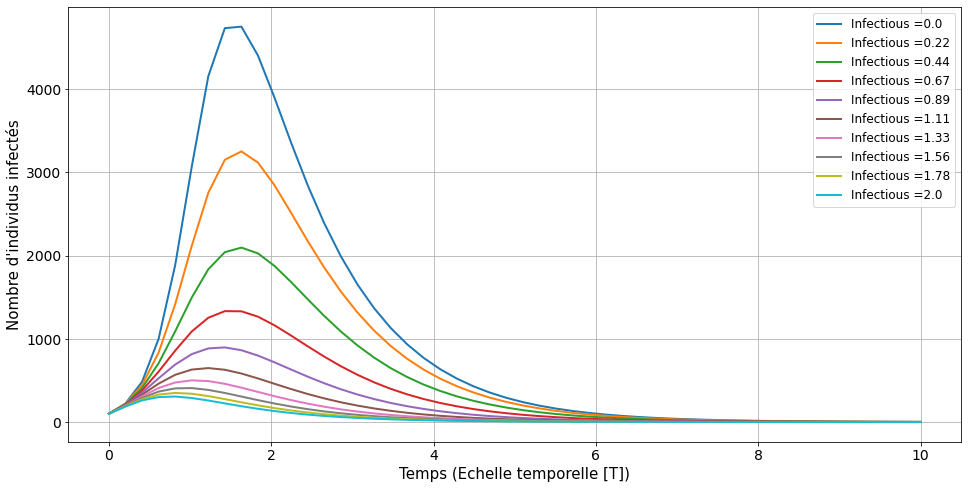

In [461]:
####Prise en compte de la vaccination

#nu: taux de vaccinnation

##Fonction des EDO prenant en compte la vaccination
def diff_systeme_vacc_epidemie(param,t,nu):
    beta=5
    gamma=1
    S,I,R,N=param
    N=S+I+R
    dSdt=(-beta/N)*I*S-(nu*S)
    dIdt=((beta/N)*I*S)-(gamma*I)
    dRdt=(gamma*I)+(nu*S)
    dN=dSdt+dIdt+dRdt
    
    return [dSdt,dIdt,dRdt,dN]


##Fonction de résolution et de plot
def resolve_vaccination():
    beta=5
    gamma=1
    S0=9900
    I0=100
    R0=0
    N=S0+R0+I0
    S,R,I,T=np.array([]),np.array([]),np.array([]),np.array([])
    param_0=[S0,I0,R0,N]
    pyplot.figure(figsize=(16,8))
    t=np.linspace(0,10)
    for taux_vac in (np.linspace(0,2,10)):                         ###Prise en considération de taux de vaccination variable de 0 à 2.
        nu=taux_vac
        #nu=np.random.uniform(1,5)                                

        result=odeint(diff_systeme_vacc_epidemie,param_0,t,args=(nu,))
        S=np.append(S,result[:,0])
        I=np.append(I,result[:,1])
        R=np.append(R,result[:,2])
        T=np.append(T,t)

        

        #pyplot.plot(t,result[:,0],linestyle="-",color='green',linewidth=2,label="Susceptible")
        pyplot.plot(t,result[:,1],linestyle="-",linewidth=2,label='Infectious ={}'.format(np.round(taux_vac,2)))
        #pyplot.plot(T,R,linestyle="-",color='orange',linewidth=2,label="Recovered")
        #pyplot.plot(T,N,linestyle="-",color='blue',linewidth=2,label="Total population")

    plotting_stuff(1,1)
    pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
    pyplot.ylabel("Nombre d'individus infectés",size=15)
    #pyplot.xlim(0,)
    #pyplot.ylim(0,)
    pyplot.savefig("vaccination_epidemie_variable",dpi=300)


    pyplot.show()
        
resolve_vaccination()


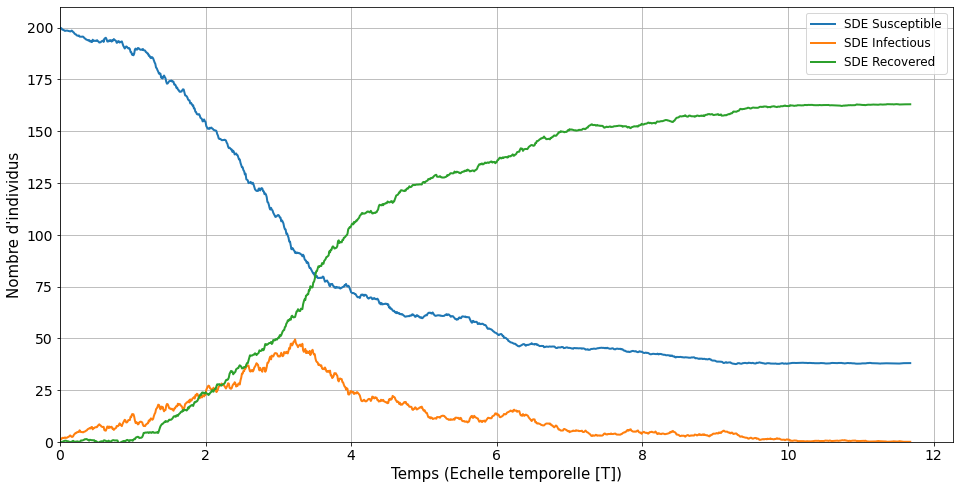

In [464]:
###Influence de l'environnement
###On consière beta et gamma variable suivant une distribution uniforme de borne variable

S,R,I,T=np.array([]),np.array([]),np.array([]),np.array([])
S0=200
I0=1
R0=0
N=S0+R0+I0

s=S0
r=R0
i=I0
t_SDE=0
deltat=0.01
S=np.append(S,s)
R=np.append(R,r)
I=np.append(I,i)
T=np.append(T,t_SDE)
#EULERS METHOD CALCUL 
while(i>=0 and s>0):
    beta=np.random.uniform(0,5)
    gamma=np.random.uniform(0,2)
    dwi=np.random.randn(1)
    dwg=np.random.randn(1)
    s=s+(((-beta/N)*i*s*deltat)+(np.sqrt((beta/N)*i*s)*dwi*np.sqrt(deltat)))
    i=i+(((beta*s*i/N)-gamma*i)*deltat)-(np.sqrt((beta/N)*i*s)*dwi*np.sqrt(deltat))+(np.sqrt(gamma*i)*dwg*np.sqrt(deltat))
    #print("s vaut:{}".format(s))
    #print("i vaut:{}".format(i))
    if (i>=0 and s>0):
        S=np.append(S,s)
        I=np.append(I,i)
        R=np.append(R,(N-s-i))
        T=np.append(T,t_SDE)
        #print("t vaut:{}".format(deltat))
        t_SDE+=deltat
    elif i<0:
        I=np.append(I,0)
        S=np.append(S,s)
        R=np.append(R,(N-s-i))
        t_SDE+=deltat
        T=np.append(T,t_SDE)
        break
pyplot.figure(figsize=(16,8))
pyplot.plot(T,S,linestyle="-",linewidth=2,label="SDE Susceptible")
pyplot.plot(T,I,linestyle="-",linewidth=2,label="SDE Infectious")
pyplot.plot(T,R,linestyle="-",linewidth=2,label="SDE Recovered")

plotting_stuff(1,1)
pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
pyplot.ylabel("Nombre d'individus",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.savefig("influence_environnement1",dpi=300)
